### import and functions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/stats gen/data')

In [ ]:
# please set the path to your data directory here
path = '/content/drive/MyDrive/stats gen/data'
from CB_02704 import *

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2
import numpy as np

In [ ]:
def calculate_af(geno):
  af = geno.mean(axis=1).filled(-1)/2
  return af
def calculate_normalized(geno, p = None):
  if p is None:
    p = calculate_af(geno)
  norm = ((geno - (2*p)[:, np.newaxis])/np.sqrt(2*p*(1-p))[:,np.newaxis]).filled(0)
  return norm

In [ ]:
def calc_r(X): # *
    '''Calculates the correlation between rows of masked array X'''
    # copy the genotype matrix into two separate matrices offset by one row
    A = X[:-1].copy() # everything but last row
    B = X[1:].copy() # everything but first row

    # set the mask of both to True if either one of the entries are masked
    A.mask = B.mask = (A.mask | B.mask)

    # Calculate number of non-missing values for each pair of rows
    N = (~A.mask).sum(axis=1)

    # Calculate the sums
    sum_A  = A.sum(axis=1).filled(0)
    sum_B  = B.sum(axis=1).filled(0)

    sum_A2 = (A**2).sum(axis=1).filled(0)
    sum_B2 = (B**2).sum(axis=1).filled(0)

    sum_AB = (A*B).sum(axis=1).filled(0)

    # note that in the above we fill in missing data with a 0
    # remove if denominator is 0 (or if all data was missing)
    rel_rows = ((np.sqrt(N*sum_A2 - sum_A**2)*np.sqrt(N*sum_B2 - sum_B**2) != 0))

    return ( (N[rel_rows]*sum_AB[rel_rows] - sum_A[rel_rows]*sum_B[rel_rows])
            / np.sqrt(N[rel_rows]*sum_A2[rel_rows] - sum_A[rel_rows]**2) /
               np.sqrt(N[rel_rows]*sum_B2[rel_rows] - sum_B[rel_rows]**2))

In [ ]:
populations = ['CEU', 'CHB', 'JPT', 'YRI', 'TSI', 'CHD', 'LWK', 'MKK', 'ASW', 'GIH', 'MXL']
admixed = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
n_individuals = [112, 84, 86, 113, 88, 85, 90, 143, 49, 88, 50]

### plink maf

In [ ]:
folder_path = "/content/drive/MyDrive/stats gen/maf"

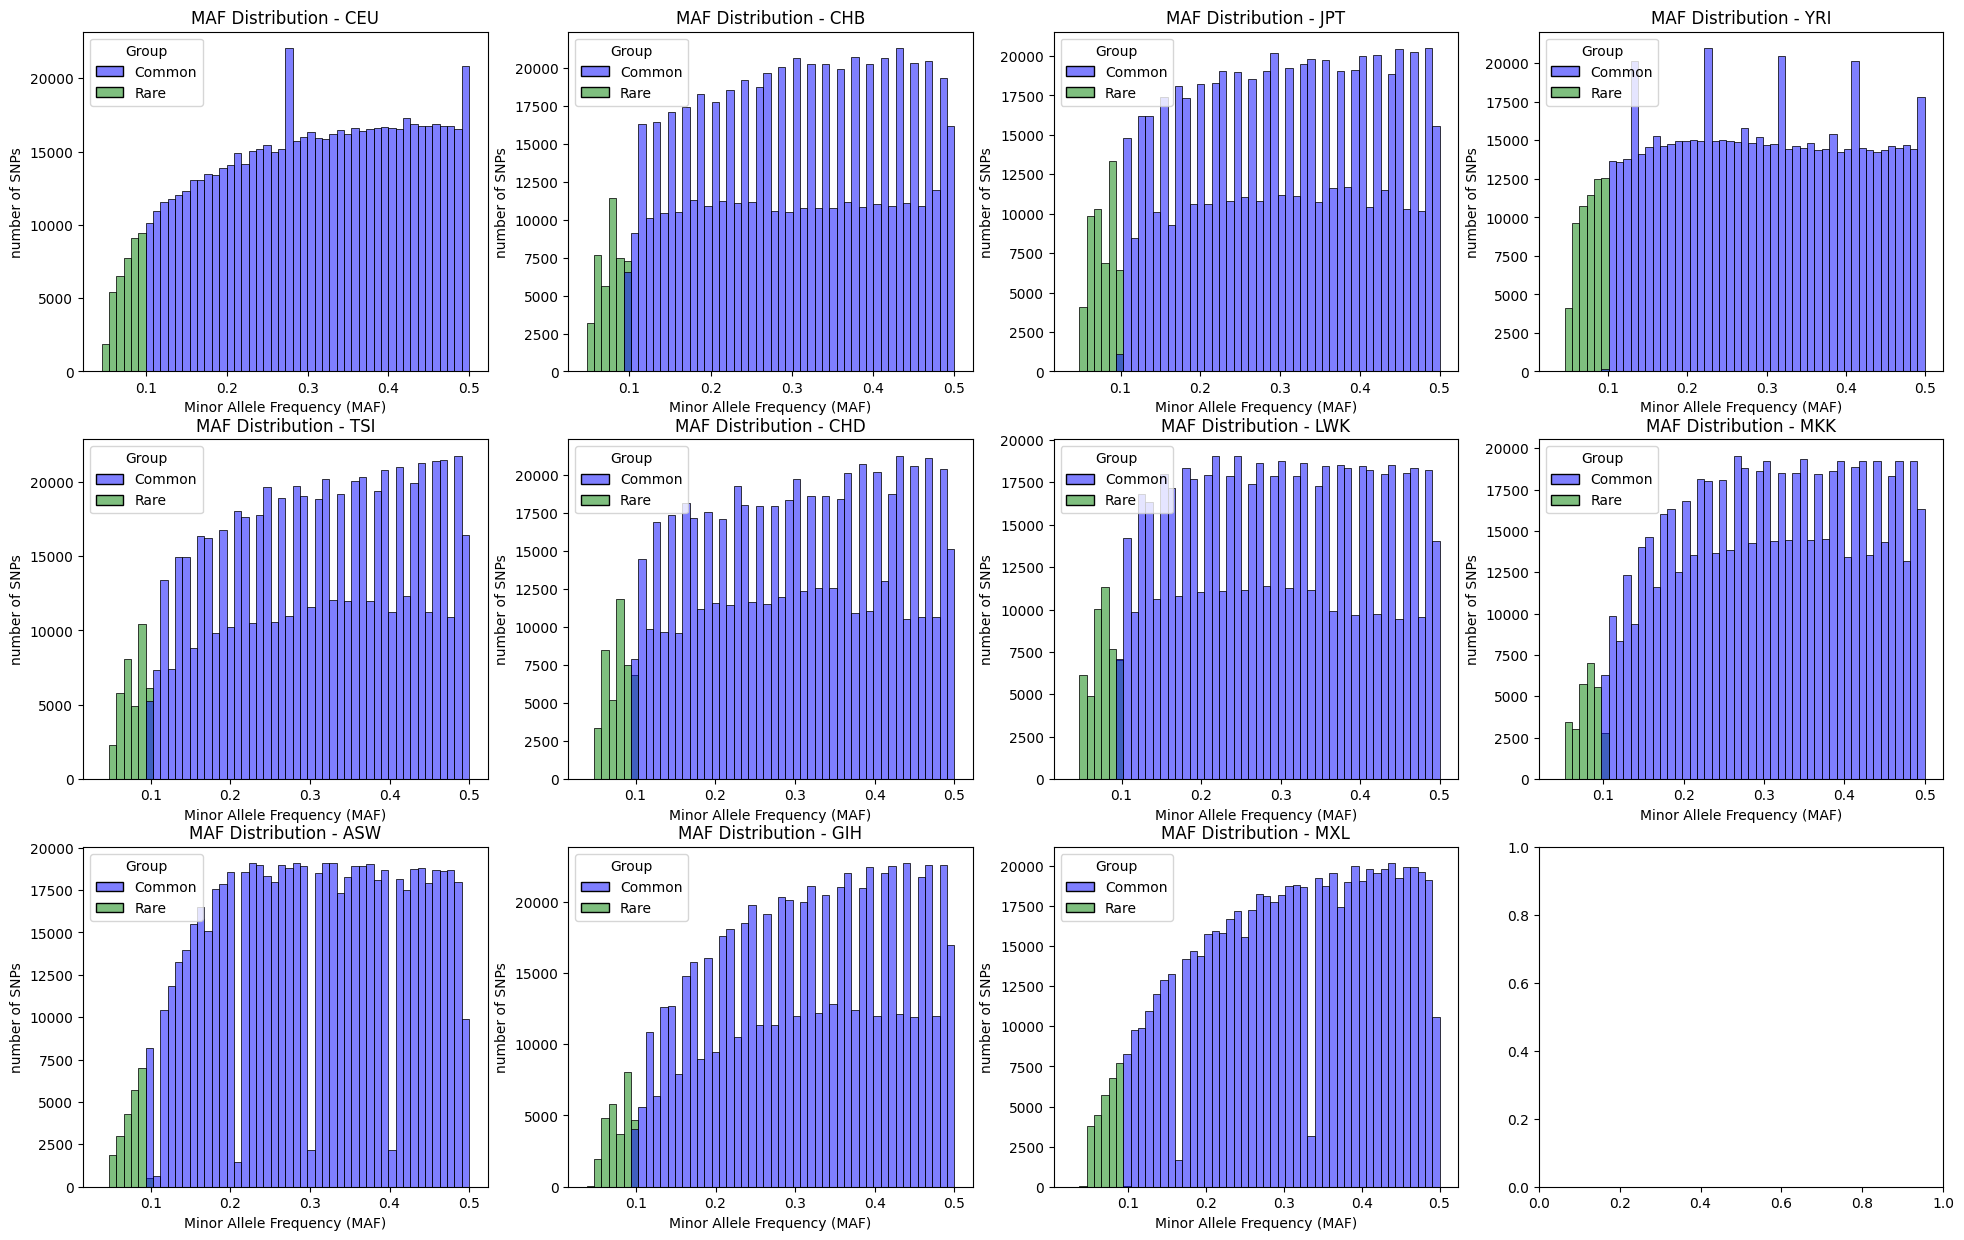

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(24, 15))
axes = axes.flatten()
#maf_list = []
for i, pop in enumerate(populations):
  maf_file = f"{folder_path}/{pop}.frq"
  maf = pd.read_csv(maf_file, sep='\s+')
  maf['Group'] = maf['MAF'].apply(lambda x: 'Rare' if x < 0.1 else 'Common')
  #maf_list.append(maf)
  sns.histplot(data=maf, x='MAF', hue='Group', palette={'Common': 'blue', 'Rare': 'green'}, bins=50, ax=axes[i])
  #axes[i].hist(maf, bins=15, color='blue', alpha=0.7, density=True)
  axes[i].set_title(f'MAF Distribution - {pop}')
  axes[i].set_xlabel('Minor Allele Frequency (MAF)')
  axes[i].set_ylabel('number of SNPs')

### ADMIXTURE

### Ancestry analysis

In [ ]:
folder_path = "/content/drive/MyDrive/stats gen"

In [ ]:
pop_file = f"{folder_path}/ASW_final.2.Q"
asw_pop = pd.read_csv(pop_file, sep='\s+', header=None, names=['CEU', 'YRI'])

In [ ]:
avg_pop1 = asw_pop['CEU'].mean()
avg_pop2 = asw_pop['YRI'].mean()

In [ ]:
print(avg_pop1, avg_pop2)

0.3009768775510204 0.6990231224489796


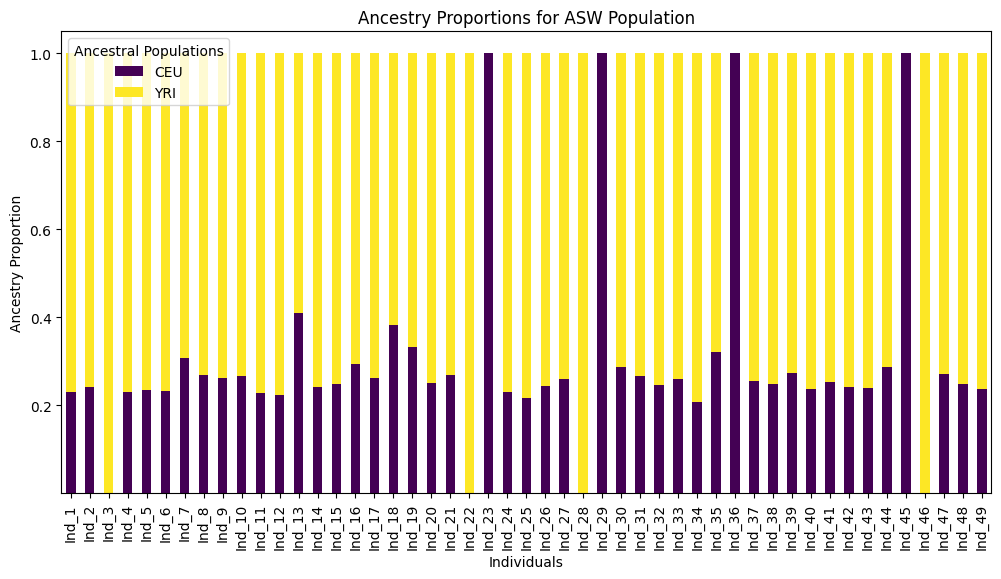

In [ ]:
asw_pop['Individual'] = ['Ind_' + str(i+1) for i in range(len(asw_pop))]

# Plot
asw_pop.set_index('Individual').plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Ancestry Proportions for ASW Population')
plt.xlabel('Individuals')
plt.ylabel('Ancestry Proportion')
plt.legend(title='Ancestral Populations')

In [ ]:
# @title
folder_path = "/content/drive/MyDrive/stats gen"

In [ ]:
# @title
pop_file = f"{folder_path}/ASW_final.3.Q"
asw_pop = pd.read_csv(pop_file, sep='\s+', header=None, names=['CEU', 'Unknown', 'YRI'])

In [ ]:
# @title
avg_pop1 = asw_pop['CEU'].mean()
avg_pop2 = asw_pop['ASW'].mean()
avg_pop3 = asw_pop['YRI'].mean()

In [ ]:
# @title
print(avg_pop1, avg_pop2, avg_pop3)

In [ ]:
# @title
asw_pop['Individual'] = ['Ind_' + str(i+1) for i in range(len(asw_pop))]

# Plot
asw_pop.set_index('Individual').plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Ancestry Proportions for ASW Population')
plt.xlabel('Individuals')
plt.ylabel('Ancestry Proportion')
plt.legend(title='Ancestral Populations')

In [ ]:
folder_path = "/content/drive/MyDrive/stats gen"
pop_file = f"{folder_path}/CEU_final.2.Q"
ceu_pop = pd.read_csv(pop_file, sep='\s+', header=None, names=['CEU', 'pop2'])
avg_pop1 = ceu_pop['CEU'].mean()
avg_pop2 = ceu_pop['pop2'].mean()
print(avg_pop1, avg_pop2)

0.9365072499999999 0.06349275


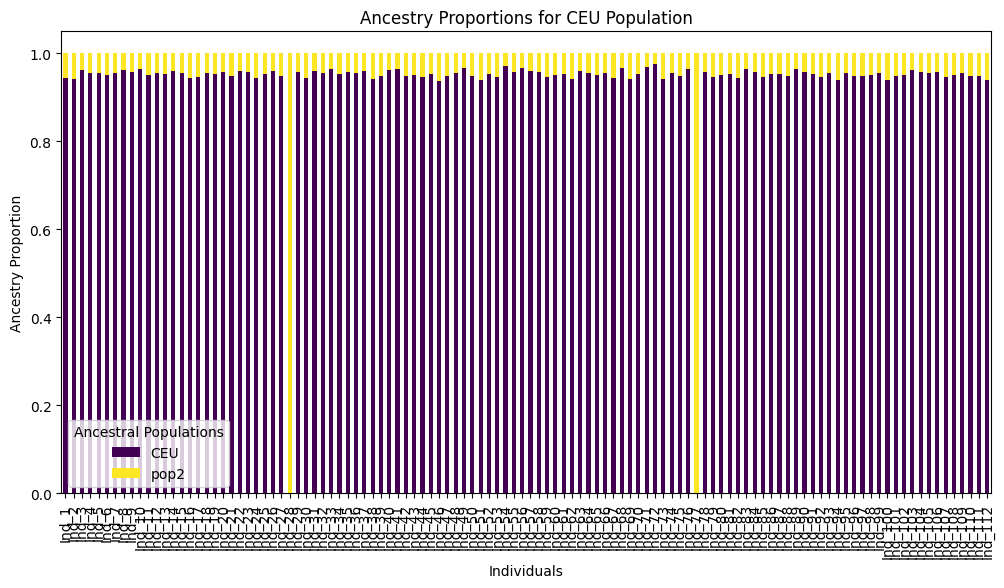

In [ ]:
ceu_pop['Individual'] = ['Ind_' + str(i+1) for i in range(len(ceu_pop))]

# Plot
ceu_pop.set_index('Individual').plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Ancestry Proportions for CEU Population')
plt.xlabel('Individuals')
plt.ylabel('Ancestry Proportion')
plt.legend(title='Ancestral Populations')

In [ ]:
folder_path = "/content/drive/MyDrive/stats gen"
pop_file = f"{folder_path}/YRI_final.2.Q"
yri_pop = pd.read_csv(pop_file, sep='\s+', header=None, names=['pop2', 'YRI'])
avg_pop1 = yri_pop['YRI'].mean()
avg_pop2 = yri_pop['pop2'].mean()
print(avg_pop1, avg_pop2)

0.8909323716814159 0.10906762831858408


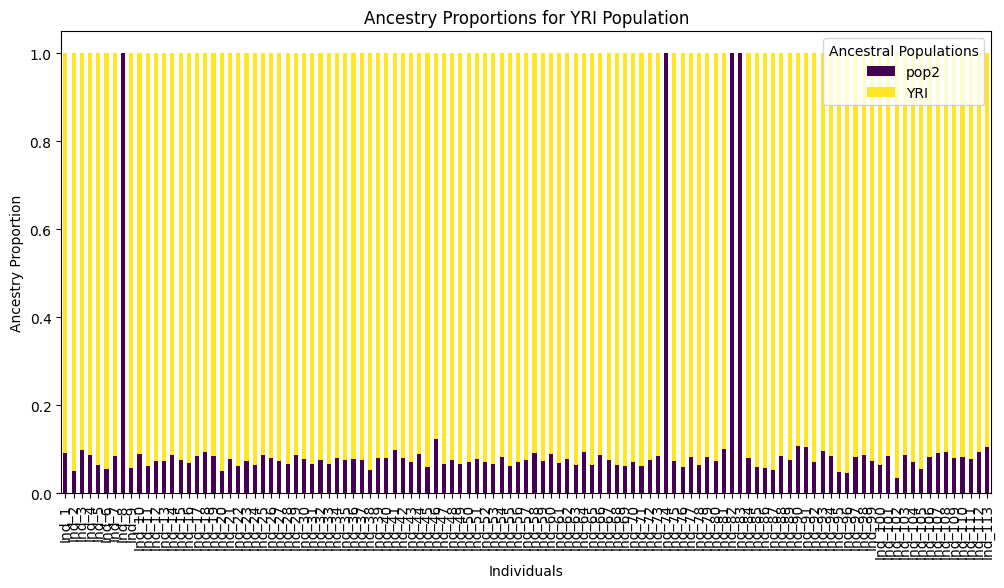

In [ ]:
yri_pop['Individual'] = ['Ind_' + str(i+1) for i in range(len(yri_pop))]

# Plot
yri_pop.set_index('Individual').plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Ancestry Proportions for YRI Population')
plt.xlabel('Individuals')
plt.ylabel('Ancestry Proportion')
plt.legend(title='Ancestral Populations')

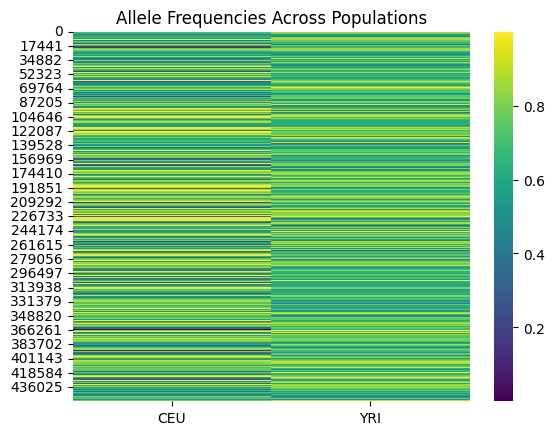

In [ ]:
folder_path = "/content/drive/MyDrive/stats gen"
af_file = f"{folder_path}/ASW_final.2.P"
asw_af = pd.read_csv(af_file, sep='\s+', header=None, names=['CEU', 'YRI'])
#asw_af['SNP'] = ['Ind_' + str(i+1) for i in range(len(asw_af))]

# Plot
sns.heatmap(asw_af, cmap="viridis", cbar=True)
plt.title("Allele Frequencies Across Populations")
plt.show()

In [ ]:
asw_af.describe()

,CEU,YRI
count,453441.000000,453441.000000
mean,0.692316,0.700239
std,0.212354,0.141971
min,0.000010,0.249749
25%,0.546570,0.595298
50%,0.704987,0.703216
75%,0.852969,0.808835
max,0.999990,0.999990


### LD Decay

In [ ]:
bins = np.arange(0, 101, 1)  # Bins from 0 to 70 kb

In [ ]:
r2_list = []

In [ ]:
asw_data = pd.read_csv('/content/drive/MyDrive/stats gen/ASW_ld.ld', sep='\s+')
ceu_data = pd.read_csv('/content/drive/MyDrive/stats gen/CEU_ld.ld', sep='\s+')
yri_data = pd.read_csv('/content/drive/MyDrive/stats gen/YRI_ld.ld', sep='\s+')

In [ ]:
asw_data['distance_kb'] = (asw_data['BP_B'] - asw_data['BP_A']) / 1000
asw_data['grp'] = pd.cut(asw_data['distance_kb'], bins)

ceu_data['distance_kb'] = (ceu_data['BP_B'] - ceu_data['BP_A']) / 1000
ceu_data['grp'] = pd.cut(ceu_data['distance_kb'], bins)

yri_data['distance_kb'] = (yri_data['BP_B'] - yri_data['BP_A']) / 1000
yri_data['grp'] = pd.cut(yri_data['distance_kb'], bins)

In [ ]:
r2_list.append(asw_data.groupby('grp')['R2'].mean())
r2_list.append(ceu_data.groupby('grp')['R2'].mean())
r2_list.append(yri_data.groupby('grp')['R2'].mean())

<ipython-input-58-86cde06b29f8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  r2_list.append(asw_data.groupby('grp')['R2'].mean())
<ipython-input-58-86cde06b29f8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  r2_list.append(ceu_data.groupby('grp')['R2'].mean())
<ipython-input-58-86cde06b29f8>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  r2_list.append(yri_data.groupby('grp')['R2'].mean())


(0.0, 0.65)

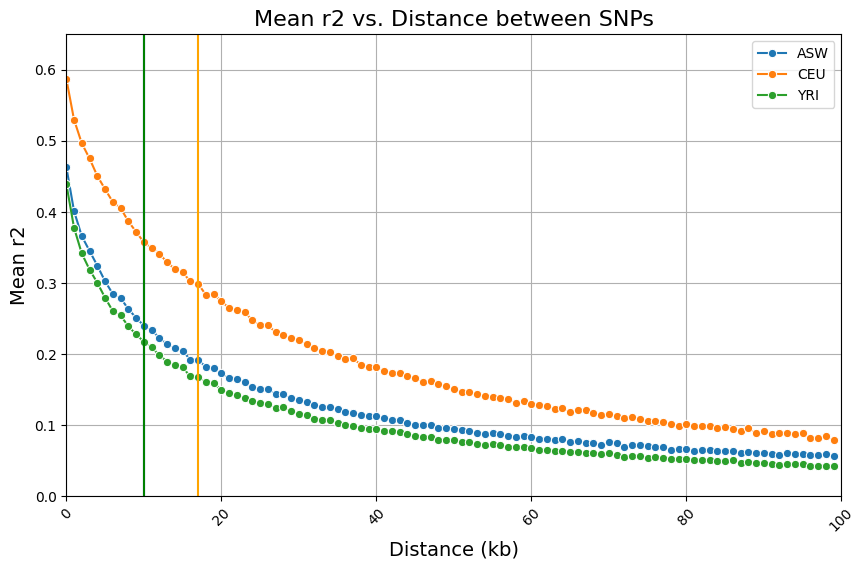

In [ ]:
plt.figure(figsize=(10, 6))
for i, pop in enumerate(['ASW', 'CEU', 'YRI']):
  sns.lineplot(x=np.arange(0, 100, 1), y=r2_list[i], marker='o', label=f'{pop}')
plt.axvline(x=17, color='orange')
plt.axvline(x=10, color='blue')
plt.axvline(x=10, color='green')
plt.title(f'Mean r2 vs. Distance between SNPs', fontsize=16)
plt.xlabel('Distance (kb)', fontsize=14)
plt.ylabel('Mean r2', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(0, 0.65)

In [ ]:
af = np.loadtxt("/content/drive/MyDrive/stats gen/admixture/ASW_final.2.P")

In [ ]:
af

array([[0.500453, 0.52987 ],
       [0.414978, 0.551757],
       [0.99999 , 0.882962],
       ...,
       [0.634327, 0.873674],
       [0.99999 , 0.823002],
       [0.340403, 0.712505]])

In [ ]:
def calculate_fst(p1, p2):
    H_s1 = 2 * p1 * (1 - p1)
    H_s2 = 2 * p2 * (1 - p2)
    H_t = 2 * (p1 + p2) / 2 * (1 - (p1 + p2) / 2)  # Heterozygosity for total
    fst = (H_t - (H_s1 + H_s2) / 2) / H_t
    return fst

In [ ]:
fst_values = []
for i in range(af.shape[0]):  # Iterate through SNPs
    p1 = af[i, 0]  # Frequency in Pop1
    p2 = af[i, 1]  # Frequency in Pop2
    fst_values.append(calculate_fst(p1, p2))

# Calculate average Fst
average_fst = np.mean(fst_values)
print(f"Average Fst between Pop1 and Pop2: {average_fst}")

Average Fst between Pop1 and Pop2: 0.0833516018395314
